In [42]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
sns.set_style("darkgrid")
# Clustering
from sklearn.datasets import load_iris
import pylab as pl
from itertools import cycle
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [43]:
%cd /Users/Manre/Documents/code/va/documentation/data/youtube/

/Users/Manre/Documents/code/va/documentation/data/youtube


In [44]:
df = pd.read_csv("0.txt", sep="\t", header=None)

In [45]:
df.columns = ['name', 'uploader', 'age', 'category', 'length', 'views', 'rate', 'revisaresto', 'comments', 'related_video 1', 'related_video 2', 'related_video 3', 'related_video 4', 'related_video 5', 'related_video 6', 'related_video 7', 'related_video 8', 'related_video 9', 'related_video 10', 'related_video 11', 'related_video 12', 'related_video 13', 'related_video 14', 'related_video 15', 'related_video 16', 'related_video 17', 'related_video 18', 'related_video 19', 'related_video 20']

In [46]:
df['age'] = df['age'].fillna(742)
df['views'] = df['views'].fillna(0)
df['rate'] = df['rate'].fillna(0)
df['category'] = df['category'].fillna(0)
df['length'] = df['length'].fillna(0)

In [47]:
# Preprocessing categories
categories = df['category'].value_counts().index.values
tmp = {}
for i in range(len(categories)):
    tmp[categories[i]] = i
categories = tmp
# Creating new field
df['num_category'] = df['category'].map(lambda x: categories[x])

In [48]:
# Creating Plot_2D
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

#1. Cluster Views vs Categories - KMeans

In [49]:
data = df[['views', 'num_category']]
data = data.values

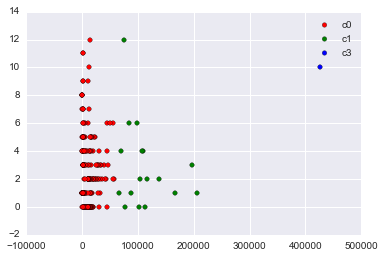

In [50]:
# KMeans
rng = RandomState(423) #Default: 42
kmeans = KMeans(n_clusters=3, random_state=rng).fit(data)
plot_2D(data, kmeans.labels_, ["c0", "c1", "c3"])

#2. Cluster Length vs Age - KMeans

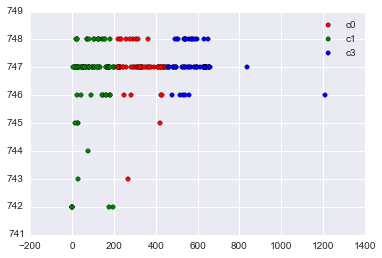

In [51]:
data = df[['length', 'age']]
data = data.values
kmeans = KMeans(n_clusters=3, random_state=rng).fit(data)
plot_2D(data, kmeans.labels_, ["c0", "c1", "c3"])

In [ ]:
categorias del video a vs categorías de las relaciones del video A y frecuencia